In [ ]:
# https://www.kaggle.com/c/titanic/overview

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
submission_example = pd.read_csv("./gender_submission.csv")

In [ ]:
# Survived : 0 = no, 1 = yes
# Pclass : 1 = 1st, 2 = 2nd, 3 = 3rd
# Embarked : C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
# pclass: A proxy for socio-economic status (SES)
# 1st = Upper
# 2nd = Middle
# 3rd = Lower

# age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

# sibsp: The dataset defines family relations in this way...
# Sibling = brother, sister, stepbrother, stepsister
# Spouse = husband, wife (mistresses and fiancés were ignored)

# parch: The dataset defines family relations in this way...
# Parent = mother, father
# Child = daughter, son, stepdaughter, stepson
# Some children travelled only with a nanny, therefore parch=0 for them.

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [41]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
# Age, Cabin, Embarked의 nan값은 어떻게 처리할 것인가..? test에선 Fare도..?

# Age는 mean값
# Cabin은 nan이 너무 많아서 버린다..?
# Embarked는 mode값

# test의 Fare 1개 nan값은 fare의 mean값

# 각각 이렇게 처리..

# Age는 10대, 20대 와 같이 나이대로 처리하여 구분지어보자(nan값보다 나중에 처리할 예정)
# 각 나이를 하나하나 다 처리하기엔 나이가 다양하고 숫자가 너무 제각각..

In [76]:
train["Age"].fillna(train["Age"].mean(), inplace = True)
test["Age"].fillna(test["Age"].mean(), inplace = True)

train.drop(labels = ["Cabin"], axis = 1, inplace = True)
test.drop(labels = ["Cabin"], axis = 1, inplace = True)

train["Embarked"].fillna(train["Embarked"].mode()[0], inplace = True)
test["Embarked"].fillna(test["Embarked"].mode()[0], inplace = True)

test["Fare"].fillna(test["Fare"].mean(), inplace = True)

In [45]:
train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Sagesser, Mlle. Emma",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Survived = 0 : 549,    Survived = 1 : 342


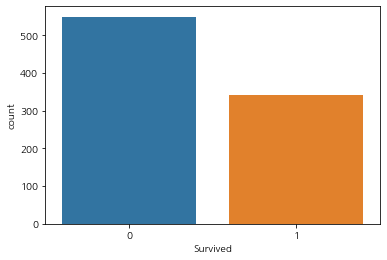

In [6]:
print("Survived = 0 : {},    Survived = 1 : {}".format(len(train[train["Survived"] == 0]),
                                                       len(train[train["Survived"] == 1])))

sns.countplot("Survived", data = train)
plt.show()

In [26]:
pclass_survived = pd.crosstab(index = train["Pclass"], columns = train["Survived"], margins = True)

# Pclass = 1  생존률
class1_survived = pclass_survived[1][1] / pclass_survived["All"][1]

# Pclass = 2  생존률
class2_survived = pclass_survived[1][2] / pclass_survived["All"][2]

# Pclass = 3  생존률
class3_survived = pclass_survived[1][3] / pclass_survived["All"][3]

print("""Pclass 1 생존율 : {}
Pclass 2 생존율 : {}
Pclass 3  생존율 : {}""".format(class1_survived, class2_survived, class3_survived))

# Pclass에 따라 생존률이 달라짐

Pclass 1 생존률 : 0.6296296296296297,
Pclass 2 생존률 : 0.47282608695652173,
Pclass 3  생존률 : 0.24236252545824846


In [77]:
pclass_survived

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [40]:
sex_total = train[["Sex", "Survived"]].groupby(by = "Sex").count()
female_total = sex_total["Survived"]["female"]
male_total = sex_total["Survived"]["male"]

sex_survived = train.pivot_table(values = "Survived", index = "Sex", aggfunc = "sum")
female_survived = sex_survived["Survived"]["female"]
male_survived = sex_survived["Survived"]["male"]

male_survived_ratio = male_survived / male_total
female_survived_ratio = female_survived / female_total

print("""남성 생존율 : {}
여성 생존율 : {}""".format(male_survived_ratio, female_survived_ratio))

# 여성의 생존율이 더 높음

남성 생존율 : 0.18890814558058924
여성 생존율 : 0.7420382165605095


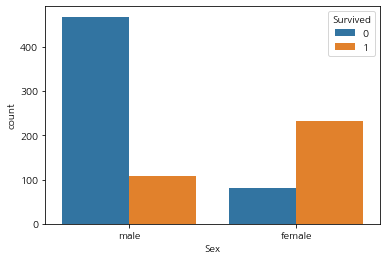

In [10]:
sns.countplot("Sex", data = train, hue = "Survived")
plt.show()

In [42]:
train[["Age", "Survived"]]

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0
...,...,...
886,27.0,0
887,19.0,1
888,NaN,0
889,26.0,1


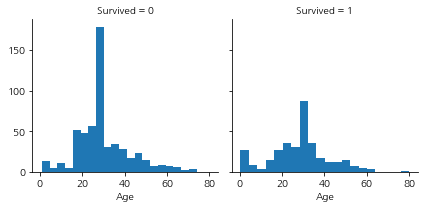

In [79]:
g = sns.FacetGrid(train, col = "Survived")
g.map(plt.hist, "Age", bins = 20)
plt.show()